# Final Project Machine Learning - Nadav Gofer an Alon Friedman

## part 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm

from sklearn import neighbors
%matplotlib inline

### loadin the data

In [2]:
train_data = pd.read_csv("feature_data.csv")
test_data = pd.read_csv("feature_data_test.csv")
train_data_labels = pd.read_csv("label_data.csv")

### visualization raw data

In [3]:
print(train_data.shape)
train_data.head()

(89542, 34)


,Unnamed: 0,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
0,51014,309.0,2016,May,week_20,13,2,0.0,0,PRT,...,0,0.0,215.0,0.0,0,0.0,0.250606,17.588299,True,1.0
1,28536,3.0,2016,October,week_41,2,2,0.0,0,ESP,...,0,3.0,0.0,1.0,1,1.0,0.444719,2.343371,True,NaN
2,21745,NaN,2017,March,week_12,19,1,0.0,0,DEU,...,4,4.0,0.0,0.0,0,1.0,0.598733,2.498820,True,NaN
3,17502,153.0,2015,September,week_40,29,2,0.0,0,GBR,...,3,3.0,0.0,0.0,0,1.0,0.335675,12.411559,True,NaN
4,83295,33.0,2016,January,week_5,25,2,0.0,0,BRA,...,0,0.0,15.0,0.0,0,0.0,0.492874,5.743378,True,NaN


In [4]:
print(test_data.shape)
test_data.head()

(29848, 34)


,Unnamed: 0,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
0,22167,2.0,2016,March,week_12,19,1,0.0,0,PRT,...,3,3.0,0.0,NaN,0,1.0,0.737167,1.770881,True,NaN
1,11664,462.0,2017,May,week_21,25,2,0.0,0,PRT,...,0,0.0,0.0,0.0,0,1.0,0.194943,21.511707,False,NaN
2,43471,74.0,2015,September,week_38,18,2,0.0,0,PRT,...,0,0.0,0.0,0.0,0,0.0,0.442849,8.763037,True,NaN
3,7697,NaN,2016,August,week_35,21,3,1.0,0,ITA,...,7,7.0,0.0,0.0,0,1.0,0.432131,NaN,True,NaN
4,106026,25.0,2017,February,week_7,12,2,0.0,0,DEU,...,3,3.0,0.0,0.0,0,0.0,0.552624,5.029345,True,0.0


In [5]:
train_data.describe()

,Unnamed: 0,time_until_order,order_year,order_day_of_month,adults,children,babies,prev_canceled,prev_not_canceled,changes,...,anon_feat_3,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_13
count,89542.000000,76861.000000,89542.000000,89542.000000,89542.000000,89538.000000,89542.000000,89542.000000,89542.000000,86065.000000,...,89542.000000,89542.000000,85510.000000,85309.000000,85294.000000,89542.000000,85811.000000,86810.000000,84585.000000,5776.000000
mean,59716.762871,103.673879,2016.157658,15.828807,1.857497,0.103732,0.007896,0.087411,0.137701,0.223877,...,0.032231,0.989971,1.330944,2.339401,0.062607,0.571922,0.335691,0.427146,8.845679,0.365132
std,34495.242240,106.940156,0.707461,8.779753,0.565296,0.397797,0.095194,0.849799,1.496269,0.663361,...,0.176613,1.698086,1.879927,17.516854,0.243415,0.793567,0.472234,0.128140,5.236673,0.481509
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161008,0.038632,0.000000
25%,29838.250000,18.000000,2016.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328012,4.452191,0.000000
50%,59743.500000,69.000000,2016.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.425622,8.422255,0.000000
75%,89610.500000,159.000000,2017.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.511077,12.712815,1.000000
max,119388.000000,737.000000,2017.000000,31.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,...,1.000000,9.000000,11.000000,391.000000,3.000000,5.000000,1.000000,0.907525,27.172399,1.000000


In [6]:
df = train_data_labels.groupby("cancelation").agg({'cancelation': np.size})
df.rename(columns={'cancelation': 'cancelation', 
                    'cancelation': 'count'}
                   , inplace=True)
df

,count
cancelation,
False,56346
True,33196


C:\Users\fried\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fried\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


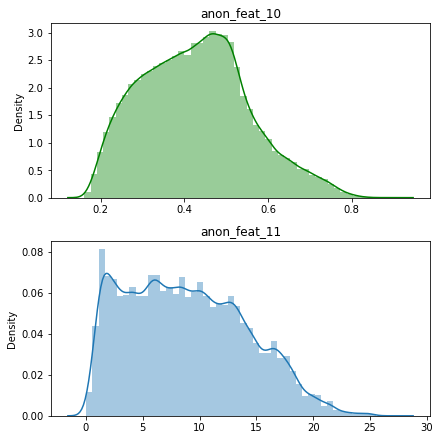

In [7]:
#density of continues features

fig, axs = plt.subplots(2, figsize=(6,6), constrained_layout=True)          
       
sns.distplot(ax = axs[0], x = train_data["anon_feat_10"], color = "green")      
axs[0].set_title('anon_feat_10')
    
sns.distplot(ax = axs[1], x = train_data["anon_feat_11"], label = "fd")
axs[1].set_title('anon_feat_11')

plt.show()

In [8]:
#orgenizing week and month

d=dict(zip(pd.date_range('2000-01-01', freq='M', periods=12).strftime('%B'), range(1,13)))
train_data['order_month'] = train_data['order_month'].map(d).fillna(-1).astype(int)

train_data['order_week'] = train_data.order_week.str.lstrip("week_")
train_data["order_week"] = train_data["order_week"].astype(int)
train_data[['order_week','order_month']]



,order_week,order_month
0,20,5
1,41,10
2,12,3
3,40,9
4,5,1
...,...,...
89537,21,5
89538,16,4
89539,35,8
89540,34,-1


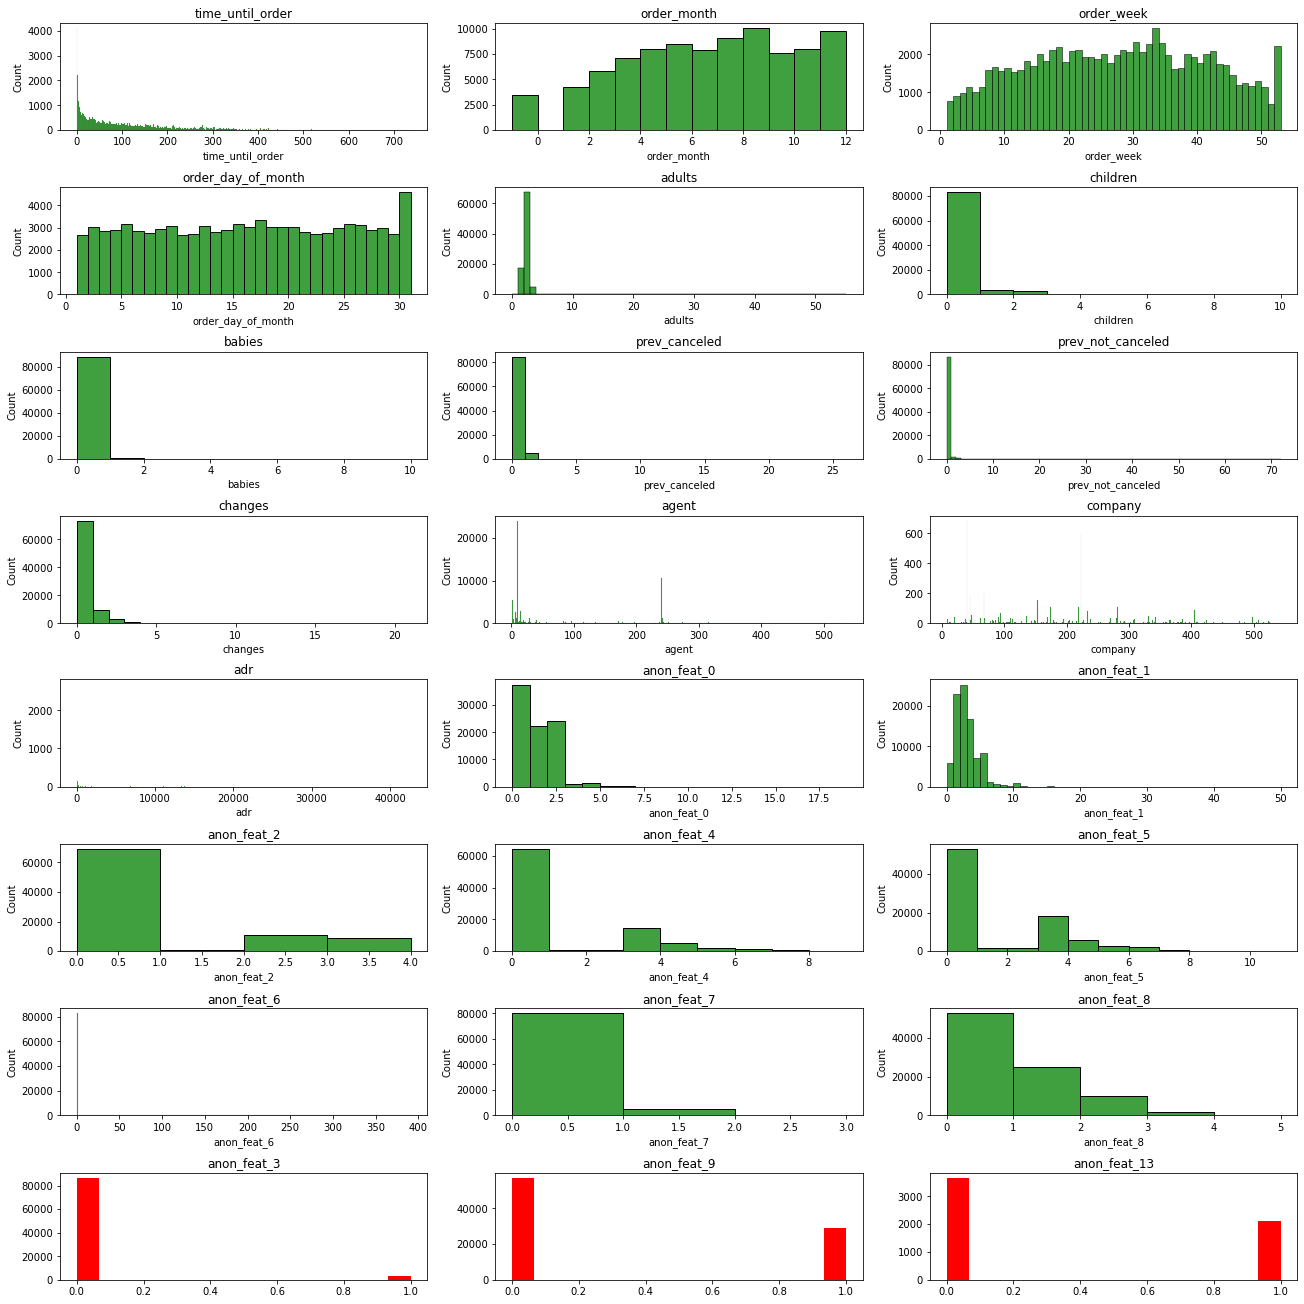

In [9]:
fig, axs = plt.subplots(8,3, figsize=(18,18), constrained_layout=True)


list_disc= ["time_until_order",
       "order_month",
       "order_week",
       "order_day_of_month",
       "adults",
       "children",
       "babies",
       "prev_canceled",
       "prev_not_canceled",
       "changes",
       "agent",
       "company",
       "adr",
       "anon_feat_0",
       "anon_feat_1",
       "anon_feat_2",
       "anon_feat_4",
       "anon_feat_5",
       "anon_feat_6",
       "anon_feat_7",
       "anon_feat_8"]

list_bin = ["anon_feat_3", 
            "anon_feat_9",
            "anon_feat_13"]


i=0
j=0
for col in list_disc:
    sns.histplot(ax = axs[i, j], x = train_data[col], color = "green", binwidth = 1)
    axs[i, j].set_title(col)
    j+=1
    if(j == 3):
        i+=1
        j=0

for col in list_bin:
    axs[i, j].hist(train_data[col].ravel(),bins = 15, color = 'red')
    axs[i, j].set_title(col)
    j+=1
    if(j == 3):
        i+=1
        j=0

plt.show()

#we want to add describe to each plot in a box

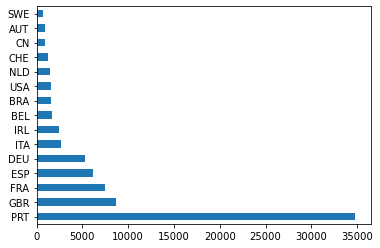

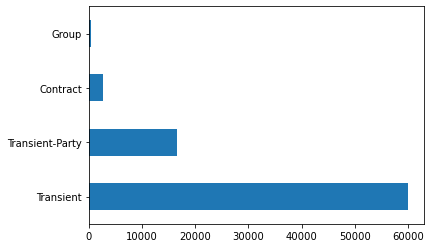

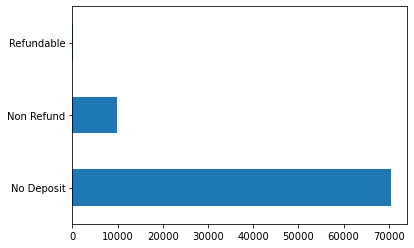

In [10]:
#ploting categorial data

train_data['country'].value_counts().head(15).plot.barh()
plt.show()
train_data['customer_type'].value_counts().plot.barh()
plt.show()
train_data['deposit_type'].value_counts().plot.barh()
plt.show()

<AxesSubplot:>

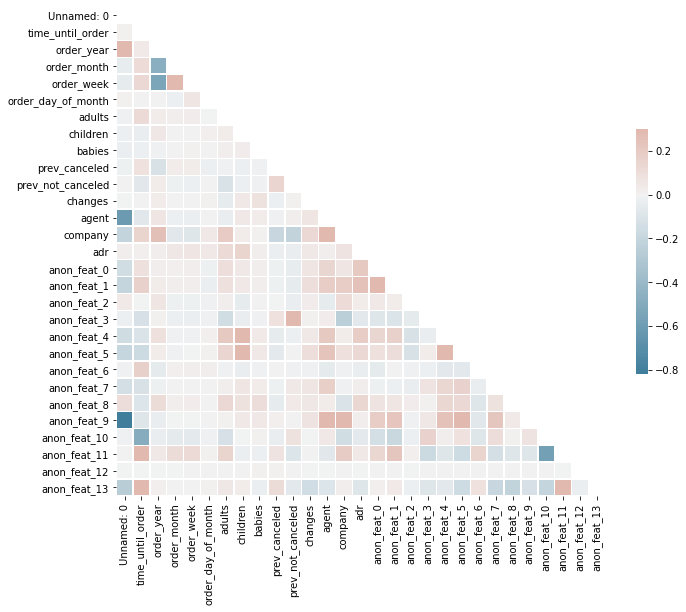

In [11]:
cor = train_data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### pre-processing

<AxesSubplot:xlabel='time_until_order', ylabel='Count'>

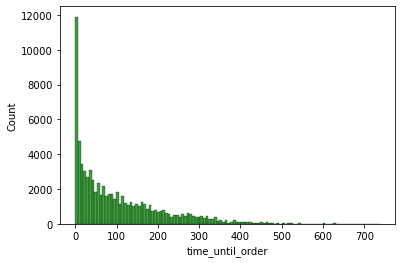

In [12]:
#example of how we handaled outlier at max

sns.histplot(x = train_data["time_until_order"], color = "green")

In [13]:
train_data["time_until_order"]
train_data["time_until_order"].max()

737.0

In [14]:
#remove_outlier function (cutoff) with 3 stdv

def remove_outlier(df_in, col_name):
    sqrt=df_in[col_name].std()
    avg=df_in[col_name].mean()
    cut=sqrt*3
    fence_low  = avg - cut
    fence_high = avg + cut
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out[col_name].max()

#Choosing features according to the bar plots that have potential outlier

outlier_list=["time_until_order","adults","children", "babies", "prev_canceled","prev_not_canceled", "changes", "adr",
              "anon_feat_0", "anon_feat_1", "agent"]

#copying the Data Frame

train_fixed=train_data.copy()

#For Loop for the Remove outlier Function. We replace the out layers with the max value 

for outlier in outlier_list:
    max_train_outlier= remove_outlier(train_data,outlier)
    train_fixed[outlier] = train_fixed[outlier].apply(lambda x: max_train_outlier if x > max_train_outlier else x)


<AxesSubplot:xlabel='time_until_order', ylabel='Count'>

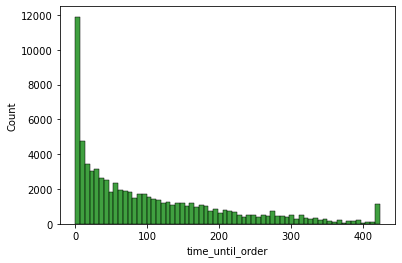

In [15]:
sns.histplot(x = train_fixed["time_until_order"], color = "green")

In [16]:
#wich features have null values, and amount

print(train_fixed.isnull().sum())

Unnamed: 0                 0
time_until_order       12681
order_year                 0
order_month                0
order_week                 0
order_day_of_month         0
adults                     0
children                   4
babies                     0
country                 4341
order_type                 0
acquisition_channel        0
prev_canceled              0
prev_not_canceled          0
changes                 3477
deposit_type            9006
agent                  12196
company                84480
customer_type           9895
adr                     2983
anon_feat_0             3381
anon_feat_1                0
anon_feat_2                0
anon_feat_3                0
anon_feat_4                0
anon_feat_5             4032
anon_feat_6             4233
anon_feat_7             4248
anon_feat_8                0
anon_feat_9             3731
anon_feat_10            2732
anon_feat_11            4957
anon_feat_12               0
anon_feat_13           83766
dtype: int64


In [17]:
#filling null at numeric features with median

list_num = ["time_until_order",
            "children",
            "changes",
            "agent",
            "adr",
            "anon_feat_0",
            "anon_feat_5",
            "anon_feat_9",
            "anon_feat_10",
            "anon_feat_11"]

for col in list_num:
    med = train_fixed[col].median()
    train_fixed[col] = train_fixed[col].fillna(med)
    
#filling -1 values at month with median

med = train_fixed["order_month"].median()
train_fixed["order_month"] = train_fixed["order_month"].apply(lambda x: med if x < 0 else x)

#filling null values at deposit_type, customer_type with the most common category

list_cat = ["deposit_type",
            "customer_type"]

for col in list_cat:
    train_fixed[col] = train_fixed[col].fillna(train_fixed[col].mode().iloc[0])
    
#filling null values at 'country' with 'unknown'

train_fixed["country"] = train_fixed["country"].fillna('unknown')

In [18]:
#we didn't fill null at features that we are going to drop

print(train_fixed.isnull().sum())

Unnamed: 0                 0
time_until_order           0
order_year                 0
order_month                0
order_week                 0
order_day_of_month         0
adults                     0
children                   0
babies                     0
country                    0
order_type                 0
acquisition_channel        0
prev_canceled              0
prev_not_canceled          0
changes                    0
deposit_type               0
agent                      0
company                84480
customer_type              0
adr                        0
anon_feat_0                0
anon_feat_1                0
anon_feat_2                0
anon_feat_3                0
anon_feat_4                0
anon_feat_5                0
anon_feat_6             4233
anon_feat_7             4248
anon_feat_8                0
anon_feat_9                0
anon_feat_10               0
anon_feat_11               0
anon_feat_12               0
anon_feat_13           83766
dtype: int64


In [19]:
#replasing True,False at anon_feat_12 with 1,0

train_fixed['anon_feat_12'].replace({False: 0, True: 1}, inplace=True)

In [20]:
#changing the index to the id 

train_data_labels = train_data_labels.set_index('Unnamed: 0').unstack(0).T
train_fixed = train_fixed.set_index('Unnamed: 0')

In [21]:
#droping unwanted features

list_unwanted = ["babies", "company", "anon_feat_6", "anon_feat_7", "anon_feat_13"]

train_fixed = train_fixed.drop(list_unwanted, axis=1)
train_fixed

,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,country,order_type,acquisition_channel,...,anon_feat_1,anon_feat_2,anon_feat_3,anon_feat_4,anon_feat_5,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
51014,309.0,2016,5.0,20,13,2,0.0,PRT,Offline TA/TO,TA/TO,...,2,2,0,0,0.0,0,0.0,0.250606,17.588299,1
28536,3.0,2016,10.0,41,2,2,0.0,ESP,Online TA,TA/TO,...,2,0,0,0,3.0,1,1.0,0.444719,2.343371,1
21745,69.0,2017,3.0,12,19,1,0.0,DEU,Direct,Direct,...,2,2,1,4,4.0,0,1.0,0.598733,2.498820,1
17502,153.0,2015,9.0,40,29,2,0.0,GBR,Offline TA/TO,TA/TO,...,8,2,0,3,3.0,0,1.0,0.335675,12.411559,1
83295,33.0,2016,1.0,5,25,2,0.0,BRA,Corporate,Corporate,...,2,0,0,0,0.0,0,0.0,0.492874,5.743378,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112553,21.0,2017,5.0,21,21,2,0.0,CHE,Online TA,TA/TO,...,2,0,0,0,0.0,1,0.0,0.321296,4.663834,1
87372,90.0,2016,4.0,16,14,2,0.0,DEU,Online TA,TA/TO,...,3,0,0,0,0.0,1,0.0,0.398224,9.486275,0
16490,39.0,2015,8.0,35,23,1,0.0,PRT,Online TA,TA/TO,...,5,0,0,0,0.0,1,1.0,0.387626,6.245419,0


In [22]:
#we a lot of countries, wich will give us a lot of dummy variables, so we reduce the amount of countries

print("amount of all countries: " + str(train_fixed['country'].value_counts().count()))

country_present = train_fixed['country'].value_counts()/train_fixed['country'].value_counts().sum()

#the first 15 countries represent 90% of the data
print("precsentage of 23 remain data at country feature: " + str(country_present[:15].sum()))


amount of all countries: 164
precsentage of 23 remain data at country feature: 0.9065801523307498


<AxesSubplot:>

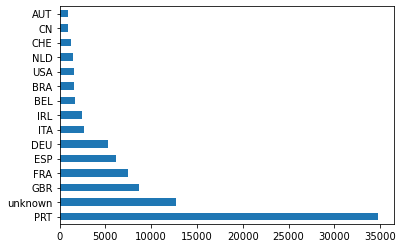

In [23]:
#reducing the amount of countries
country_present = train_fixed['country'].value_counts()/train_fixed['country'].value_counts().sum()

#choosing only the countries that have more than 1% 
country_unwanted = country_present[15:].index


#replacing the values of the unwanted countries with 'unknown'
train_fixed['country'] = train_fixed['country'].apply(lambda x: 'unknown' if x in country_unwanted else x)
train_fixed['country'].value_counts().plot.barh()

In [24]:
#making categorial to dummy
list_cat = ["order_type",
            "acquisition_channel",
            "deposit_type",
            "customer_type",
            "anon_feat_12",
            "country"]

for col in list_cat:
    dum = pd.get_dummies(train_fixed[col], prefix = col)
    train_fixed = train_fixed.drop(col,axis=1)
    train_fixed = pd.concat([train_fixed, dum], axis=1)
    
#dropping the 'unknown' country feature
train_fixed = train_fixed.drop(['country_unknown'],axis=1)

In [25]:
train_fixed_zscore=train_fixed.copy()
    
#The Z Score Normalization (Mu=0, Var=1)
for column in train_fixed_zscore:
    train_fixed_zscore[column] = (train_fixed_zscore[column] - train_fixed_zscore[column].mean()) / train_fixed_zscore[column].std()


### Feature selection

In [26]:
#spliting the train data of zscore before selecting features

X_train_z, X_validation_z, y_train_z, y_validation_z = train_test_split(train_fixed_zscore, train_data_labels, test_size = 0.2, 
                                                      random_state = 42)

In [27]:
#VC Dimensions Reduction with zscore - PCA

pca_zscore = PCA(0.99)
pca_zscore.fit(X_train_z)
pca_train_zscore= pca_zscore.transform(X_train_z)
pca_validation_zscore = pca_zscore.transform(X_validation_z)
print(pca_train_zscore.shape[1])
pca_zscore.explained_variance_ratio_

49


array([0.07736635, 0.06962172, 0.04619104, 0.04297677, 0.0378636 ,
       0.03669598, 0.03612517, 0.03416562, 0.0290939 , 0.02563131,
       0.02360106, 0.0224952 , 0.02101777, 0.01896356, 0.01842524,
       0.0181795 , 0.01807903, 0.01796583, 0.01785999, 0.01782366,
       0.01757612, 0.01743425, 0.01739784, 0.01722917, 0.01717749,
       0.01690889, 0.0166217 , 0.01660404, 0.0161154 , 0.01600106,
       0.01585117, 0.01531981, 0.01489072, 0.01477413, 0.01421784,
       0.01339984, 0.01242639, 0.01208089, 0.01176773, 0.01104009,
       0.00988968, 0.0097432 , 0.00783057, 0.00704909, 0.00625487,
       0.00556116, 0.00485778, 0.00333826, 0.003262  ])

In [28]:
#feature selection with random forest(zscore)

rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=9, criterion='entropy')
rfc1.fit(X_train_z, y_train_z)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200,
                       random_state=42)

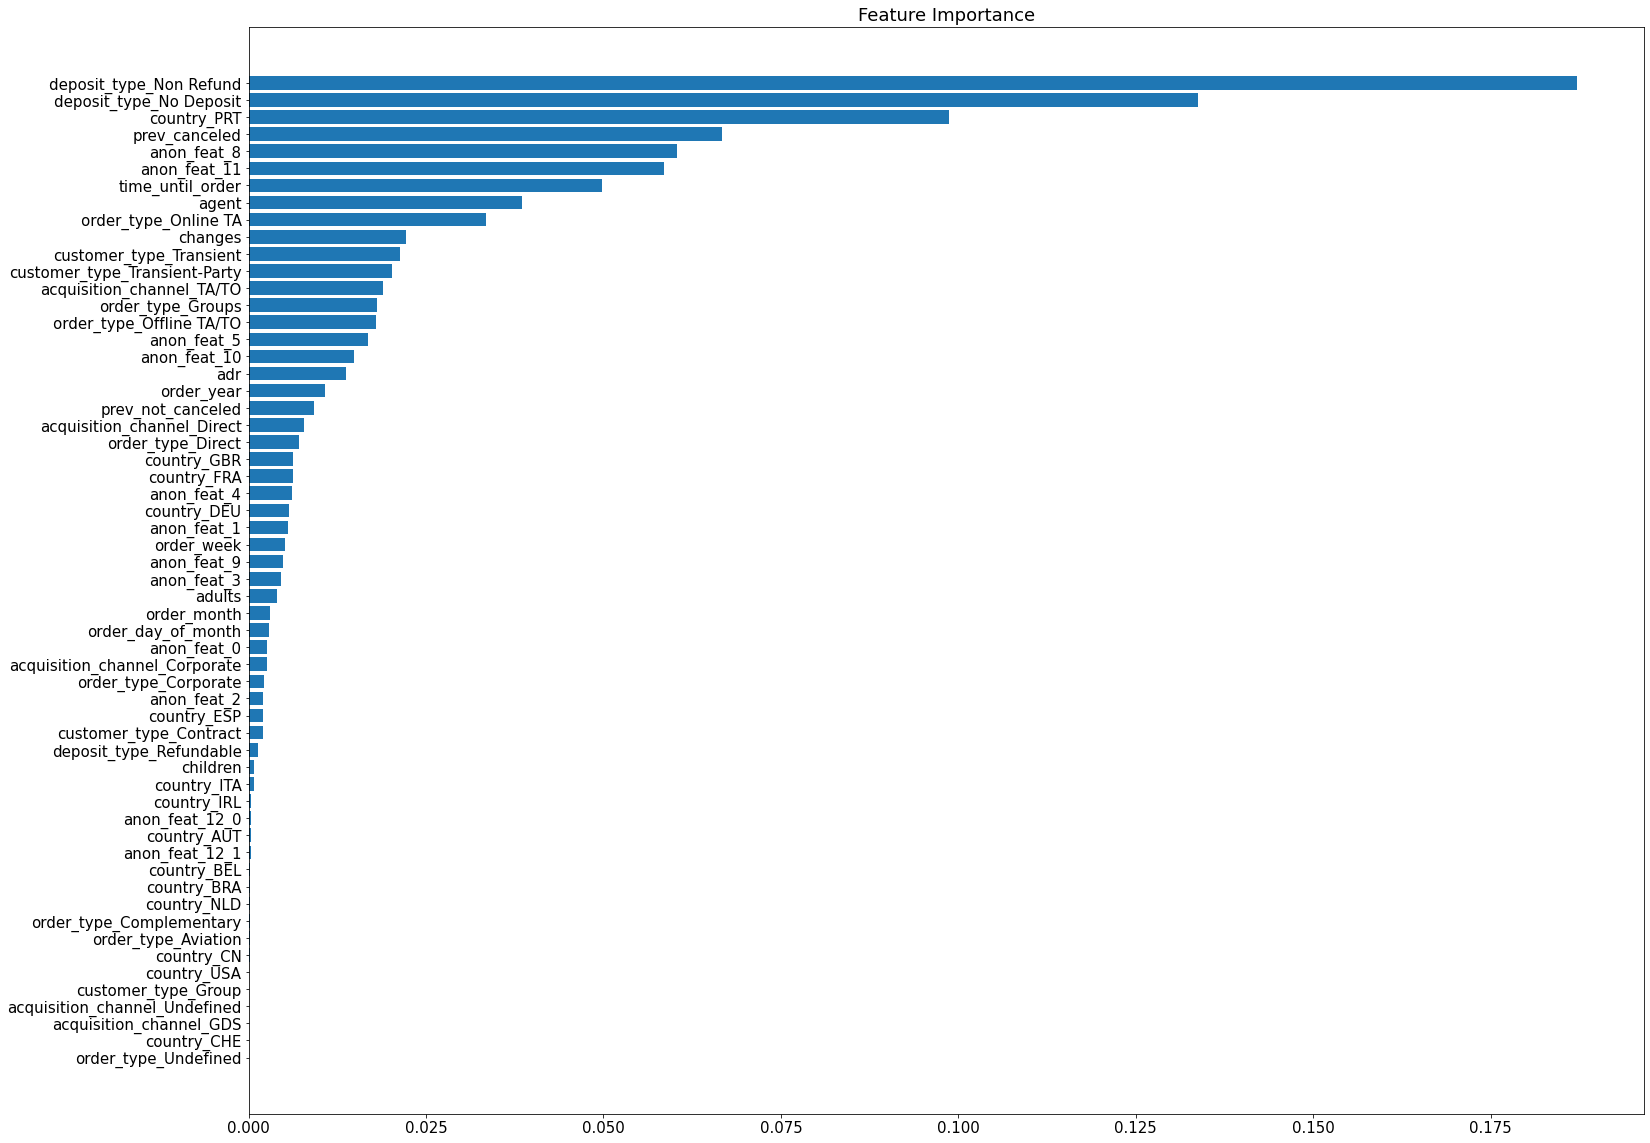

In [29]:
feature_importance = rfc1.feature_importances_         #finding the importence of each feature, from the best estimator
sorted_idx = np.argsort(feature_importance)                              #sorting the features
pos = np.arange(sorted_idx.shape[0]) + .5

plt.rcParams["figure.figsize"] = (25,20)
plt.rcParams.update({'font.size': 15})
plt.barh(pos, feature_importance[sorted_idx], align='center')            #making a sorted bar plot
plt.yticks(pos, np.array(train_fixed_zscore.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

In [30]:
#we choose the fetures that gives us 99% of the feature importence

print(feature_importance[sorted_idx][-1:-38:-1].sum())
feat_selected_RF = np.array(train_fixed_zscore.columns)[sorted_idx][-1:-38:-1]
feat_drop_RF = np.array(train_fixed_zscore.columns)[sorted_idx][0:np.array(train_fixed_zscore.columns)[sorted_idx].shape[0]-38]

0.9902008268242174


In [31]:
#reducing the features

train_data_reduced = train_fixed_zscore.drop(feat_drop_RF, axis=1)

X_train_z = X_train_z.drop(feat_drop_RF, axis=1)
X_validation_z = X_validation_z.drop(feat_drop_RF, axis=1)

In [32]:
#Test Data Pre-Processing

#orgenizing week and month

d=dict(zip(pd.date_range('2000-01-01', freq='M', periods=12).strftime('%B'), range(1,13)))
test_data['order_month'] = test_data['order_month'].map(d).fillna(-1).astype(int)

test_data['order_week'] = test_data.order_week.str.lstrip("week_")
test_data["order_week"] = test_data["order_week"].astype(int)
test_data

#remove_outlier function (cutoff) with 3 stdv

def remove_outlier(df_in, col_name):
    sqrt=df_in[col_name].std()
    avg=df_in[col_name].mean()
    cut=sqrt*3
    fence_low  = avg - cut
    fence_high = avg + cut
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out[col_name].max()

#Choosing features according to the bar plots that have potential outlier

outlier_list=["time_until_order","adults","children", "babies", "prev_canceled","prev_not_canceled", "changes", "adr",
              "anon_feat_0", "anon_feat_1", "agent"]

#copying the Data Frame

test_fixed=test_data.copy()

#For Loop for the Remove outlier Function. We replace the out layers with the max value 

for outlier in outlier_list:
    max_test_outlier= remove_outlier(test_data,outlier)
    test_fixed[outlier] = test_fixed[outlier].apply(lambda x: max_test_outlier if x > max_test_outlier else x)

    
#filling null at numeric features with median
list_num = ["time_until_order",
            "children",
            "changes",
            "agent",
            "adr",
            "anon_feat_0",
            "anon_feat_5",
            "anon_feat_9",
            "anon_feat_10",
            "anon_feat_11"]

for col in list_num:
    med = test_fixed[col].median()
    test_fixed[col] = test_fixed[col].fillna(med)
    
#filling -1 values at month with median

med = test_fixed["order_month"].median()
test_fixed["order_month"] = test_fixed["order_month"].apply(lambda x: med if x < 0 else x)

#filling null values at deposit_type, customer_type with the most common category

list_cat = ["deposit_type",
            "customer_type"]

for col in list_cat:
    test_fixed[col] = test_fixed[col].fillna(test_fixed[col].mode().iloc[0])
    
#filling null values at 'country' with 'unknown'

test_fixed["country"] = test_fixed["country"].fillna('unknown')


#replacsing True,False at anon_feat_12 with 1,0

test_fixed['anon_feat_12'].replace({False: 0, True: 1}, inplace=True)

#changing the index to the id of the order

test_fixed = test_fixed.set_index('Unnamed: 0')

#droping unwanted features

list_unwanted = ["babies", "company", "anon_feat_6", "anon_feat_7", "anon_feat_13"]

test_fixed = test_fixed.drop(list_unwanted, axis=1)
test_fixed

#feature selection

#reducing the amount of countries
country_present = test_fixed['country'].value_counts()/test_fixed['country'].value_counts().sum()

#choosing only the countries that have more than 1% 
country_unwanted = country_present[15:].index


#replacing the values of the unwanted countries with 'unknown'
test_fixed['country'] = test_fixed['country'].apply(lambda x: 'unknown' if x in country_unwanted else x)


#making categorial to dummy
list_cat = ["order_type",
            "acquisition_channel",
            "deposit_type",
            "customer_type",
            "anon_feat_12",
            "country"]

for col in list_cat:
    dum = pd.get_dummies(test_fixed[col], prefix = col)
    test_fixed = test_fixed.drop(col,axis=1)
    test_fixed = pd.concat([test_fixed, dum], axis=1)
    
#dropping the 'unknown' country feature
test_fixed = test_fixed.drop(['country_unknown'],axis=1)

#New Data Frame before normalization.
test_fixed_zscore=test_fixed.copy()
    
#The Z Score Normalization (Mu=0, Var=1)
for column in test_fixed_zscore:
    test_fixed_zscore[column] = (test_fixed_zscore[column] - test_fixed_zscore[column].mean()) / test_fixed_zscore[column].std()

In [33]:
feat_drop_RF

array(['order_type_Undefined', 'country_CHE', 'acquisition_channel_GDS',
       'acquisition_channel_Undefined', 'customer_type_Group',
       'country_USA', 'country_CN', 'order_type_Aviation',
       'order_type_Complementary', 'country_NLD', 'country_BRA',
       'country_BEL', 'anon_feat_12_1', 'country_AUT', 'anon_feat_12_0',
       'country_IRL', 'country_ITA', 'children',
       'deposit_type_Refundable', 'customer_type_Contract'], dtype=object)

In [34]:
#test data after feature reduce

#droping feature that doesn't exist in test

feat_drop_RF = np.delete(feat_drop_RF,0)

test_data_reduced = test_fixed_zscore.drop(feat_drop_RF, axis=1)

## Part 3 - choosing models

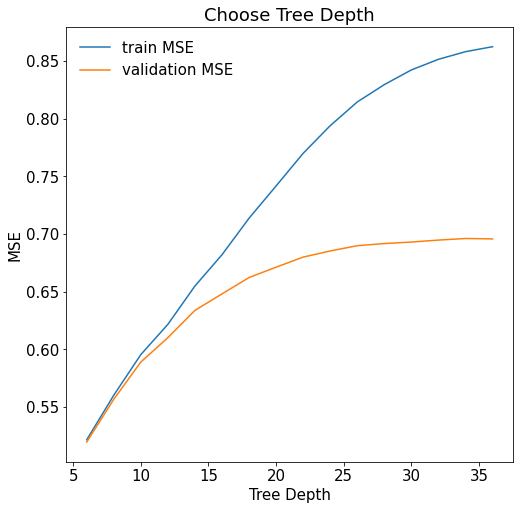

In [35]:
#Random Forest choosing tree depth


seed = 1
depth_range = range(6, 38,2)
mse_train = []
mse_validation = []

for depth in depth_range:
    model = RandomForestClassifier(random_state=6, max_features='auto', n_estimators= 200, max_depth=depth, criterion='entropy')
    model.fit(X_train_z, y_train_z)
    train_pred = model.predict_proba(X_train_z)
    test_pred = model.predict_proba(X_validation_z)
    mse_train.append(np.square(np.subtract(y_train_z,train_pred[:,0])).mean())
    mse_validation.append(np.square(np.subtract(y_validation_z,test_pred[:,0])).mean())    
    
#Plotting results

plt.figure(figsize=[8,8])
plt.plot(depth_range, mse_train, label="train MSE")
plt.plot(depth_range, mse_validation, label="validation MSE")
plt.legend(loc='upper left', frameon=False)
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.title('Choose Tree Depth')
plt.show()

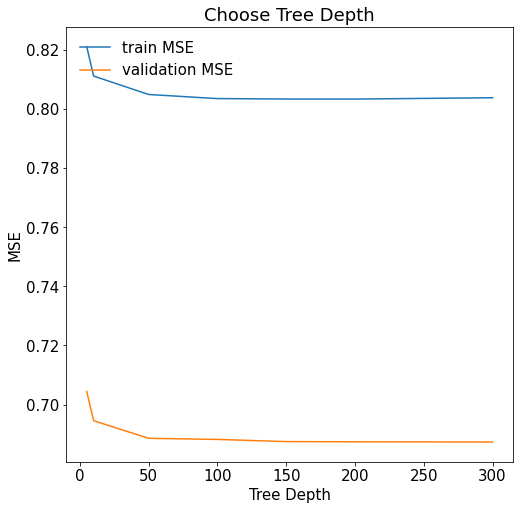

In [51]:
#Random Forest choosing n_estimators


seed = 1
n_est = [5,10,50,100,150,200,300]
mse_train = []
mse_validation = []

for n in n_est:
    model = RandomForestClassifier(random_state=6, max_features='auto', n_estimators= n, max_depth=25, criterion='entropy')
    model.fit(X_train_z, y_train_z)
    train_pred = model.predict_proba(X_train_z)
    test_pred = model.predict_proba(X_validation_z)
    mse_train.append(np.square(np.subtract(y_train_z,train_pred[:,0])).mean())
    mse_validation.append(np.square(np.subtract(y_validation_z,test_pred[:,0])).mean())    
    
#Plotting results

plt.figure(figsize=[8,8])
plt.plot(n_est, mse_train, label="train MSE")
plt.plot(n_est, mse_validation, label="validation MSE")
plt.legend(loc='upper left', frameon=False)
plt.xlabel('Tree Depth')
plt.ylabel('MSE')
plt.title('Choose Tree Depth')
plt.show()

In [38]:
#fitting with random forest with best parameters

rfc2=RandomForestClassifier(random_state=6, max_features='auto', n_estimators= 150, max_depth=25, criterion='entropy')


In [39]:
knn=KNeighborsClassifier(n_neighbors = 10, weights = 'distance')


In [40]:
logr = LogisticRegression(C = 100, penalty = 'l2', solver = 'liblinear')


In [41]:
SVM = svm.SVC(C = 10, gamma = 0.01, kernel = 'rbf')

## Part 4 - Model evaluation

In [42]:
#confusion matrix to random forest model
rfc2.fit(X_train_z, y_train_z)

train_pred = rfc2.predict_proba(X_train_z)
test_pred = rfc2.predict_proba(X_validation_z)

In [43]:
hardpredtst_tuned_thresh_train = np.where(train_pred[:,0] >= 0.5, 0, 1)
con_mat_train = confusion_matrix(y_train_z, hardpredtst_tuned_thresh_train)
hardpredtst_tuned_thresh_test = np.where(test_pred[:,0] >= 0.5, 0, 1)
con_mat_test = confusion_matrix(y_validation_z, hardpredtst_tuned_thresh_test)

#con_mat_train = confusion_matrix(y_train_z, train_pred)  #calculate the confusion matrixes
#con_mat_test = confusion_matrix(y_validation_z, test_pred)  

print("Train confusion matrix: ")
print(con_mat_train)
print("Train Accuracy:", (con_mat_train[0,0]+con_mat_train[1,1])/con_mat_train.sum())
print("\n")

print("Validation confusion matrix: ")
print(con_mat_test)
print("Validation Accuracy:", (con_mat_test[0,0]+con_mat_test[1,1])/con_mat_test.sum())



Train confusion matrix: 
[[44371   767]
 [  904 25591]]
Train Accuracy: 0.9766727625535717


Validation confusion matrix: 
[[10407   801]
 [ 1473  5228]]
Validation Accuracy: 0.8730247361661735


In [44]:
joinned = train_data_reduced.join(pd.DataFrame(train_data_labels))
labels = np.array([0 if t==True else 1 for t in joinned.values[:, -1]])

In [45]:
#K-Fold cross validation

def KfoldPlot(X, y, clf1, clf2, clf3, clf4, k):
    plt.figure(figsize=[10,10])        #collecting all plots to one plot
    j = 1;
    for clf,color,color_mean,model_name in zip([clf1,clf2,clf3,clf4],['gray', 'pink', 'yellow', 'orange'],['red', 'black', 'green', 'blue'],['knn','RF','LogR','svm']):
        if (j == 4):           #only 2 folds to svm because long run time
            k=2
        kf = KFold(n_splits=k)    #setting KFold                              
        i=1                       #counting number of KFold train
        #plt.figure()              #collecting each plot of KNN to one plot

        tpr_mean=0                         #will calculate the mean ROC from all KFold iterations
        fpr_mean = np.linspace(0, 1, 100)
        j+=1

        for train_index, test_index in kf.split(X):              #making k Folds
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            clf.fit(X_train, y_train)                             #fit the model to the current fold
            pred_prob_X = clf.predict_proba(X_test)[:, 1]         #picking one row of test and predict its probability

            fpr, tpr, thresholds = roc_curve(y_test, pred_prob_X) #setting the ROC curve
            tpr_mean += interp(fpr_mean, fpr, tpr)                
            tpr_mean[0] = 0

            plt.plot(fpr, tpr, color=color)                     #plotting each fold
            i+=1
            

        tpr_mean /= k                         #getting the mean of the k folds
        tpr_mean[-1] = 1
        auc_mean = auc(fpr_mean, tpr_mean)    #calcultate the AUC of the mean

        plt.plot([0], [0], color=color, label=model_name + " K-folds")
        plt.plot(fpr_mean, tpr_mean, color=color_mean, label=model_name + " Mean ROC = %0.3f" % auc_mean)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    pass


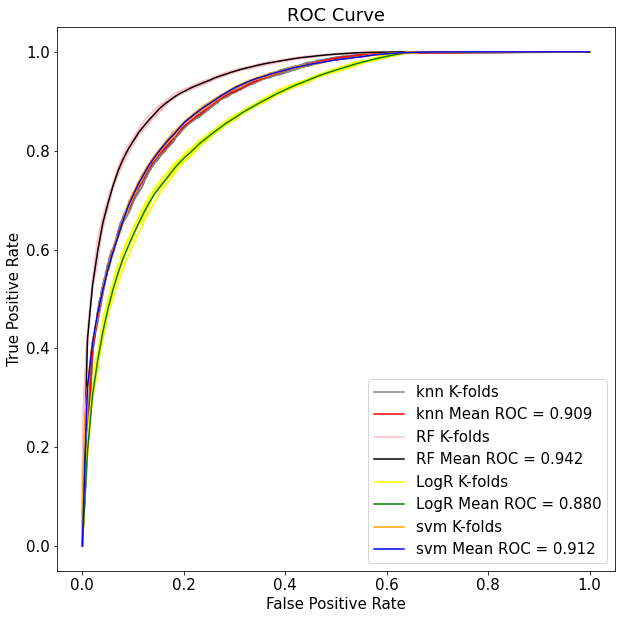

In [46]:
knn=KNeighborsClassifier(n_neighbors = 10, weights = 'distance')

rfc2=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 150, max_depth=25, criterion='entropy')

logr = LogisticRegression(C = 100, penalty = 'l2', solver = 'liblinear')

SVM = svm.SVC(probability=True, C = 10, gamma = 0.01, kernel = 'rbf')

KfoldPlot(joinned.values[:,:-1], labels, knn, rfc2, logr, SVM, 5)

In [47]:
#train the model with all the data before prediction

rfc2.fit(joinned.values[:,:-1], labels)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=150,
                       random_state=42)

In [48]:
#predict proba where cancel is true

p = rfc2.predict_proba(test_data_reduced)
p = p[:,0]
p = pd.DataFrame(p)
ind = pd.DataFrame(test_data_reduced.index)
prediction = ind.join(p)
prediction = prediction.set_index('Unnamed: 0')
prediction = prediction.rename(columns={0: "cancel_proba"})
prediction

,cancel_proba
Unnamed: 0,
22167,0.081071
11664,1.000000
43471,0.424515
7697,0.488506
106026,0.007719
...,...
85122,0.100000
80166,0.960000
107905,0.447103


In [49]:
#creating csv file

prediction.to_csv('Submission_group_6.csv')